In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import finpy_tse as tse

In [10]:
df_stock = tse.Get_CWI_History(ignore_date=True, double_date=True)

In [11]:
df_stock

,Date,Open,High,Low,Close,Adj Close,Volume
J-Date,,,,,,,
1387-09-16,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
1387-09-17,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
1387-09-18,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
1387-09-20,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
1387-09-23,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
1401-11-19,2023-02-08,1558280.0,1561350.0,1558080.0,1558082.0,1558081.6,5026161405
1401-11-23,2023-02-12,1557860.0,1557860.0,1545970.0,1545978.0,1545978.3,3851024133
1401-11-24,2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0,1548278.2,4328248989


In [12]:
df = df_stock['Volume']
df

J-Date
1387-09-16       8539624
1387-09-17      11752353
1387-09-18      15299115
1387-09-20      15689653
1387-09-23      31428174
                 ...    
1401-11-19    5026161405
1401-11-23    3851024133
1401-11-24    4328248989
1401-11-25    4062888178
1401-11-26    3892525812
Name: Volume, Length: 3423, dtype: int64

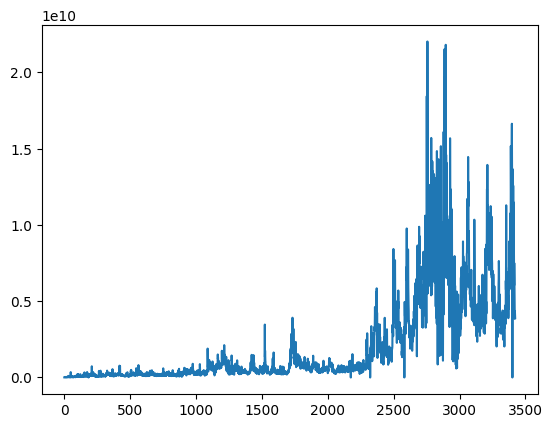

In [13]:
x = df.values
plt.plot(x)

In [14]:
max = np.max(x)
x = x / np.max(x)
x

array([0.00038769, 0.00053355, 0.00069457, ..., 0.19649843, 0.1844513 ,
       0.17671701])

In [15]:
train_size_split = 0.85
train_size = int(np.round(train_size_split * len(x)))
data_train = x[:train_size]
data_test = x[train_size:]

In [16]:
data_train

array([3.87690885e-04, 5.33545756e-04, 6.94565410e-04, ...,
       4.30351302e-01, 4.00859412e-01, 4.52355285e-01])

In [17]:
look_back = 30

In [18]:
def preprocess(data, step: int):
    app_x = []
    app_y = []
    for i in range(len(data)):
        if i <= (len(data) - (step + 1)):
            app_x.append(data[i:i + step])
            app_y.append(data[i + step])
    return np.array(app_x), np.array(app_y)

In [19]:
x_train, y_train = preprocess(data_train, look_back)

In [20]:
x_train

array([[3.87690885e-04, 5.33545756e-04, 6.94565410e-04, ...,
        1.88128793e-03, 2.30956235e-03, 8.23810126e-04],
       [5.33545756e-04, 6.94565410e-04, 7.12295467e-04, ...,
        2.30956235e-03, 8.23810126e-04, 8.27008172e-04],
       [6.94565410e-04, 7.12295467e-04, 1.42680949e-03, ...,
        8.23810126e-04, 8.27008172e-04, 4.76369029e-03],
       ...,
       [3.88361531e-01, 1.87173674e-01, 7.30969720e-01, ...,
        4.10679911e-01, 4.09330182e-01, 4.81658234e-01],
       [1.87173674e-01, 7.30969720e-01, 3.99456746e-01, ...,
        4.09330182e-01, 4.81658234e-01, 4.30351302e-01],
       [7.30969720e-01, 3.99456746e-01, 3.93310021e-01, ...,
        4.81658234e-01, 4.30351302e-01, 4.00859412e-01]])

In [21]:
y_train

array([0.00082701, 0.00476369, 0.00140439, ..., 0.4303513 , 0.40085941,
       0.45235528])

In [22]:
x_test, y_test = preprocess(data_test, look_back)

In [23]:
x_train = x_train.reshape(-1, look_back, 1)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(6, input_shape=(look_back, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
2880/2880 [==============================] - 23s 7ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 2/20
2880/2880 [==============================] - 19s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 3/20
2880/2880 [==============================] - 20s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 4/20
2880/2880 [==============================] - 20s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 5/20
2880/2880 [==============================] - 21s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 6/20
2880/2880 [==============================] - 19s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 7/20
2880/2880 [==============================] - 19s 7ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 8/20
2880/2880 [==============================] - 19s 7ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 9/20
2880/2880 [==============================] - 19s 7ms/step - loss: 0.0021 - mean_squar

In [29]:
pred = model.predict(x_test.reshape(-1, look_back, 1))

16/16 [==============================] - 1s 4ms/step


In [30]:
y_test

array([0.34761531, 0.30925932, 0.50025371, 0.26667782, 0.16554704,
       0.15731451, 0.14522788, 0.05204507, 0.07220057, 0.26606397,
       0.14644646, 0.08322557, 0.0480053 , 0.15126926, 0.20423514,
       0.12317343, 0.08968129, 0.2008279 , 0.30254728, 0.27412915,
       0.1297554 , 0.26384232, 0.36118299, 0.26007705, 0.31017581,
       0.23912252, 0.27314285, 0.19237619, 0.13905838, 0.109895  ,
       0.06531007, 0.03784677, 0.1246243 , 0.12652832, 0.04851521,
       0.02671265, 0.05743952, 0.10936753, 0.25564288, 0.1352929 ,
       0.04020587, 0.02859567, 0.10287177, 0.20088704, 0.09131703,
       0.0676733 , 0.05524028, 0.13883556, 0.22626236, 0.24684101,
       0.16805686, 0.09268025, 0.0721527 , 0.16224605, 0.08605399,
       0.09269959, 0.20301792, 0.20408105, 0.16672293, 0.13803186,
       0.21646613, 0.1794004 , 0.18008219, 0.12882467, 0.14259148,
       0.12425145, 0.14075346, 0.17382583, 0.14471278, 0.23578501,
       0.29711532, 0.19209984, 0.17555944, 0.19740574, 0.19733

In [34]:
pred

array([[0.41573426],
       [0.34091872],
       [0.3471435 ],
       [0.40742835],
       [0.33105892],
       [0.31263652],
       [0.2888207 ],
       [0.25196594],
       [0.18913865],
       [0.16116533],
       [0.19589144],
       [0.14877486],
       [0.13324946],
       [0.11737037],
       [0.13916464],
       [0.151988  ],
       [0.1327476 ],
       [0.12624218],
       [0.15985772],
       [0.1974614 ],
       [0.20583919],
       [0.18403558],
       [0.23450948],
       [0.27003995],
       [0.25163636],
       [0.28497982],
       [0.26950535],
       [0.28515896],
       [0.25553304],
       [0.23081233],
       [0.20323363],
       [0.16579066],
       [0.13130282],
       [0.13342288],
       [0.11970922],
       [0.09149116],
       [0.07767928],
       [0.07748827],
       [0.08697054],
       [0.1352679 ],
       [0.11466062],
       [0.10021877],
       [0.09449287],
       [0.1079774 ],
       [0.13342194],
       [0.10473027],
       [0.09981073],
       [0.092

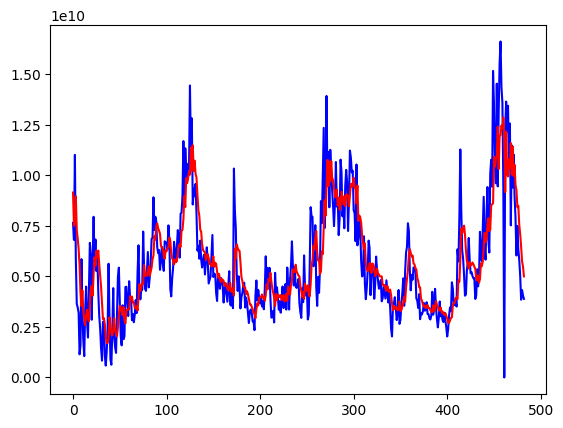

In [36]:
plt.plot(y_test * max, c='blue')
plt.plot(pred * max, c='red')

In [37]:
tse.Get_USD_RIAL(ignore_date='True')

,Open,High,Low,Close
J-Date,,,,
1390-09-06,13700,13700,13700,13700
1390-09-07,13440,13440,13440,13440
1390-09-08,13350,13350,13350,13350
1390-09-09,13400,13400,13400,13400
1390-09-10,13500,13500,13500,13500
...,...,...,...,...
1401-11-23,434100,434460,433700,433820
1401-11-24,434370,434400,434100,434130
1401-11-25,434010,434390,434000,434110


In [38]:
pred[-1] * max

array([5.00501331e+09])

In [39]:
y_test[-1] * max

3892525811.9999995

In [40]:
y_test.shape

(483,)

In [41]:
pred.shape

(483, 1)

In [42]:
dist = y_test - pred.reshape(-1, )

In [43]:
dist

array([-6.81189477e-02, -3.16594011e-02,  1.53110209e-01, -1.40750530e-01,
       -1.65511876e-01, -1.55322017e-01, -1.43592836e-01, -1.99920872e-01,
       -1.16938085e-01,  1.04898645e-01, -4.94449776e-02, -6.55492970e-02,
       -8.52441607e-02,  3.38988859e-02,  6.50705033e-02, -2.88145649e-02,
       -4.30663144e-02,  7.45857210e-02,  1.42689558e-01,  7.66677582e-02,
       -7.60837839e-02,  7.98067331e-02,  1.26673510e-01, -9.96289734e-03,
        5.85394584e-02, -4.58572976e-02,  3.63750208e-03, -9.27827694e-02,
       -1.16474659e-01, -1.20917323e-01, -1.37923563e-01, -1.27943896e-01,
       -6.67851860e-03, -6.89456279e-03, -7.11940093e-02, -6.47785062e-02,
       -2.02397539e-02,  3.18792544e-02,  1.68672345e-01,  2.49966557e-05,
       -7.44547490e-02, -7.16230996e-02,  8.37889843e-03,  9.29096435e-02,
       -4.21049160e-02, -3.70569711e-02, -4.45704519e-02,  4.59790807e-02,
        1.13513069e-01,  1.05280413e-01,  6.94650315e-03, -6.49298042e-02,
       -7.59830500e-02,  

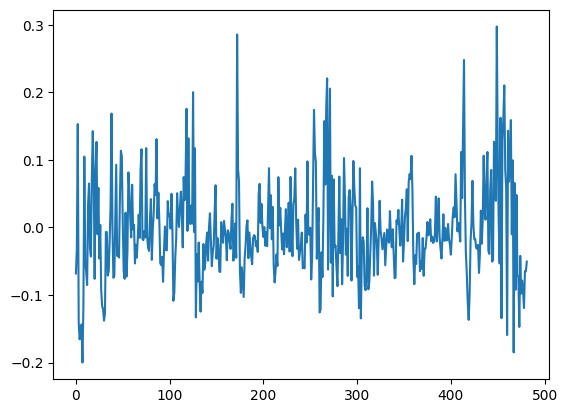

In [48]:
plt.plot(dist[dist != np.min(dist)])

In [55]:
d = tse.Get_Price_History(stock='طلا', ignore_date=True, double_date=True)
d

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,,
1396-03-20,2017-06-10,10000,10000,10000,10000,10000,7842985,78429850000,425,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-21,2017-06-11,10000,10000,10000,10000,10000,384820,3848200000,176,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-22,2017-06-12,10000,10000,10000,10000,10000,4095892,40958920000,184,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-23,2017-06-13,10000,10000,10000,10000,10000,280021,2800210000,88,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-24,2017-06-14,10000,10000,10000,10000,10000,3196327,31963270000,305,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
...,...,...,...,...,...,...,...,...,...,...,...,...
1401-11-19,2023-02-08,163250,164034,162703,163901,163468,3227389,527575920537,3278,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-11-23,2023-02-12,167000,174500,164610,172850,170703,10092291,1722789003801,7852,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-11-24,2023-02-13,173210,175600,172010,175260,174306,4836597,843045742451,5850,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم


In [61]:
def equal_log(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(True)
                    break
            else:
                l.append(False)
    return np.array(l)

In [58]:
def intersect(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(i)
                    break
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(i)
                    break
    return np.array(l)

In [74]:
dt1 = equal_log(df_stock.Date, d.Date)
dt1

array([False, False, False, ...,  True,  True,  True])

In [80]:
dt2 = intersect(df_stock.index, d.index)
dt2

array(['1396-03-20', '1396-03-21', '1396-03-22', ..., '1401-11-24',
       '1401-11-25', '1401-11-26'], dtype='<U10')

In [81]:
a = df_stock.loc[dt2, :]
a

,Date,Open,High,Low,Close,Adj Close,Volume
J-Date,,,,,,,
1396-03-20,2017-06-10,79811.0,79898.0,79811.0,79856.0,79855.7,306726428
1396-03-21,2017-06-11,79865.0,79884.0,79845.0,79871.0,79870.7,371698390
1396-03-22,2017-06-12,79873.0,79873.0,79564.0,79564.0,79564.1,261660303
1396-03-23,2017-06-13,79569.0,79576.0,79427.0,79427.0,79426.9,368730039
1396-03-24,2017-06-14,79440.0,79474.0,79432.0,79466.0,79465.7,427765186
...,...,...,...,...,...,...,...
1401-11-19,2023-02-08,1558280.0,1561350.0,1558080.0,1558082.0,1558081.6,5026161405
1401-11-23,2023-02-12,1557860.0,1557860.0,1545970.0,1545978.0,1545978.3,3851024133
1401-11-24,2023-02-13,1546530.0,1551840.0,1546530.0,1548278.0,1548278.2,4328248989


In [84]:
d2=d.loc[dt2,:]
d2

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market
J-Date,,,,,,,,,,,,
1396-03-20,2017-06-10,10000,10000,10000,10000,10000,7842985,78429850000,425,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-21,2017-06-11,10000,10000,10000,10000,10000,384820,3848200000,176,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-22,2017-06-12,10000,10000,10000,10000,10000,4095892,40958920000,184,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-23,2017-06-13,10000,10000,10000,10000,10000,280021,2800210000,88,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1396-03-24,2017-06-14,10000,10000,10000,10000,10000,3196327,31963270000,305,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
...,...,...,...,...,...,...,...,...,...,...,...,...
1401-11-19,2023-02-08,163250,164034,162703,163901,163468,3227389,527575920537,3278,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-11-23,2023-02-12,167000,174500,164610,172850,170703,10092291,1722789003801,7852,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم
1401-11-24,2023-02-13,173210,175600,172010,175260,174306,4836597,843045742451,5850,طلا,صندوق س.پشتوانه طلای لوتوس,نامعلوم


In [88]:
for i in range(len(d2.index)):
    if d2.index[i] != a.index[i]:
        print(d.index[i])

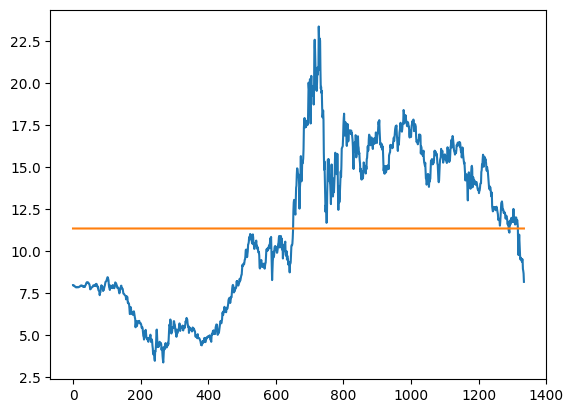

In [90]:
plt.plot(a.Close.values / d2.Close.values)
plt.plot([np.mean(a.Close.values/d2.Close.values)]*len(a.Close))